In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Clean_Dataset.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data.shape

(300153, 12)

In [4]:
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
data.isnull().sum()
# no null values

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

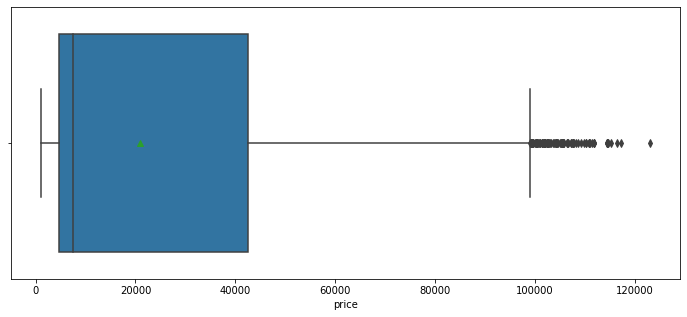

In [7]:
plt.figure(figsize = (12,5))
sns.boxplot(x = 'price', data = data, showmeans = True)
plt.show()

# Even though the mean is around 20000, we can see here that the median is approximately 7500.
# This difference is explainable by the presence of two different tickets: business and economy.

### How does the ticket price vary between Economy and Business class?

Text(0.5, 1.0, 'Airline prices based on the class and company')

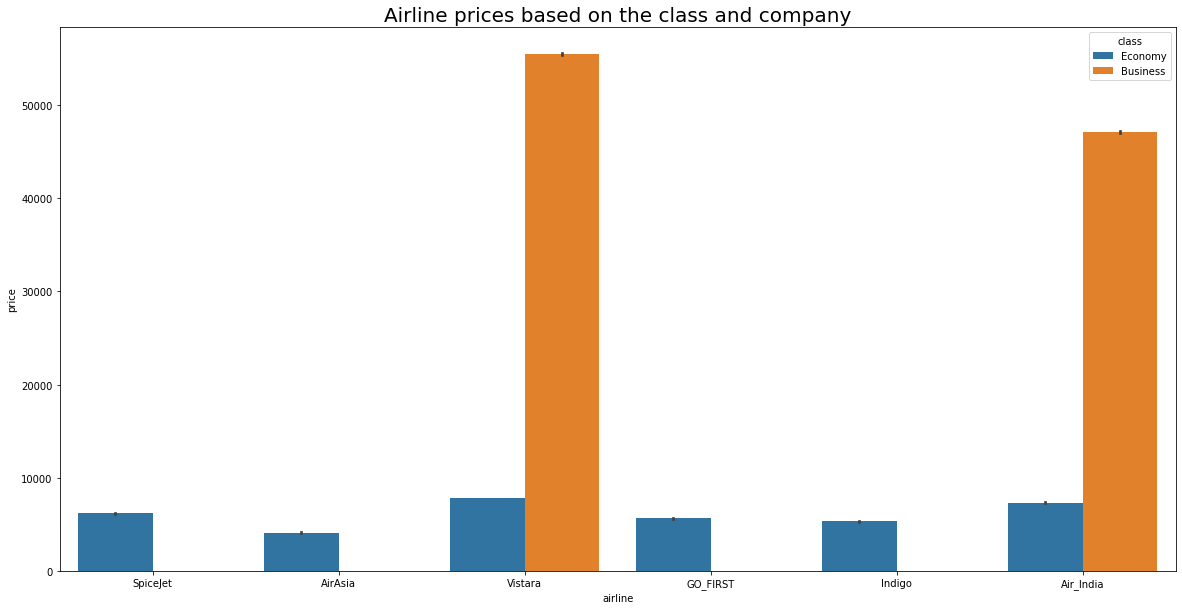

In [8]:
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=data).set_title('Airline prices based on the class and company',fontsize=20)

##### Business flights are only available in two companies: Air India and Vistara. Also, there is a big gap between the prices in the two class that reaches almost 5 times the price of Economy for Business tickets.

### Does price vary with Airlines?

Text(0.5, 1.0, 'Prices based on Economy Class')

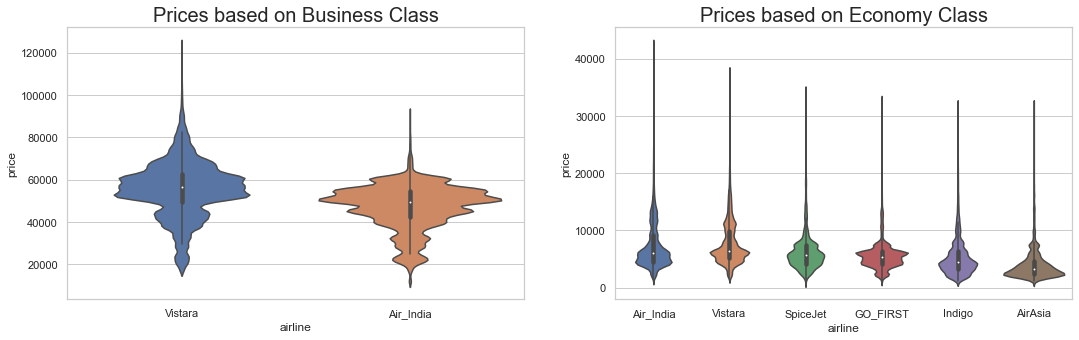

In [9]:
sns.set(style = 'whitegrid')
fig, axs = plt.subplots(1,2,figsize = (18,5))
plt.subplot(1,2,2)
sns.violinplot(y = 'price',x='airline', data = data[data['class']=='Economy'].sort_values('price',ascending = False),ax=axs[1])
plt.subplot(1,2,1)
sns.violinplot(y = 'price',x='airline', data = data[data['class']=='Business'].sort_values('price',ascending = False),ax = axs[0])
axs[0].set_title("Prices based on Business Class",fontsize = 20)
axs[1].set_title("Prices based on Economy Class",fontsize = 20)

##### Vistara's business tickets are a little more expensive than the Air India's ones.
##### AirAsia economy tickets seems to have the cheapest flights whereas Air India and Vistara are more expensive.

### How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [10]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Text(0.5, 1.0, 'Average prices depending on the days left')

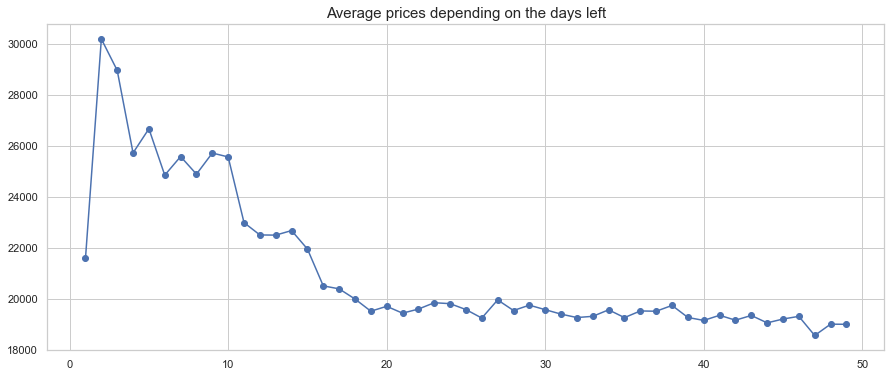

In [11]:
df = data.groupby(["days_left"])["price"].mean().reset_index()
plt.figure(figsize=(15,6))
plt.plot(df["days_left"],df["price"],marker = "o")
plt.title("Average prices depending on the days left",fontsize=15)


##### The graph highlights how the prices rise slowly and then drastically rising 20 days before the flight, but fall just one day before the flight up to three times cheaper. This can be explain by the fact the companies want to fill their empty seats and thus lower the prices of the tickets to ensure the planes remains full.

### Does the price change with the duration of the flight? 

C:\Users\soura\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


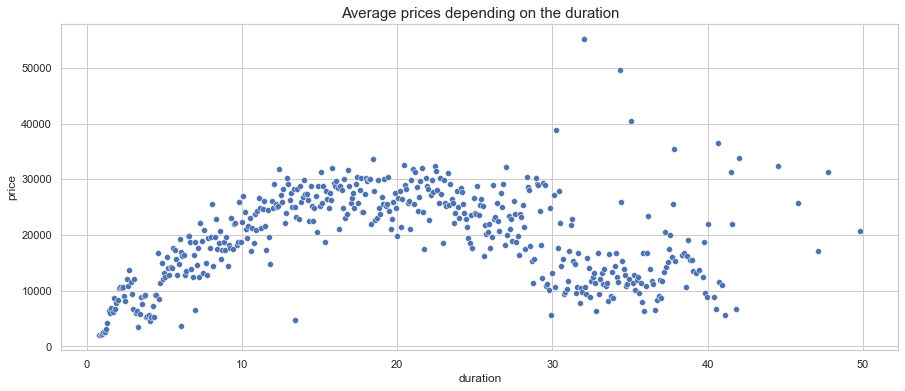

In [12]:
df = data.groupby(["duration"])["price"].mean().reset_index()
plt.figure(figsize=(15,6))
ax = sns.scatterplot(df["duration"],df["price"]).set_title("Average prices depending on the duration",fontsize=15)

##### The prices reaches a high price at a duration of 20 hours before lowering again. Some outliers are there.

### Does ticket price change based on the departure time and arrival time?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

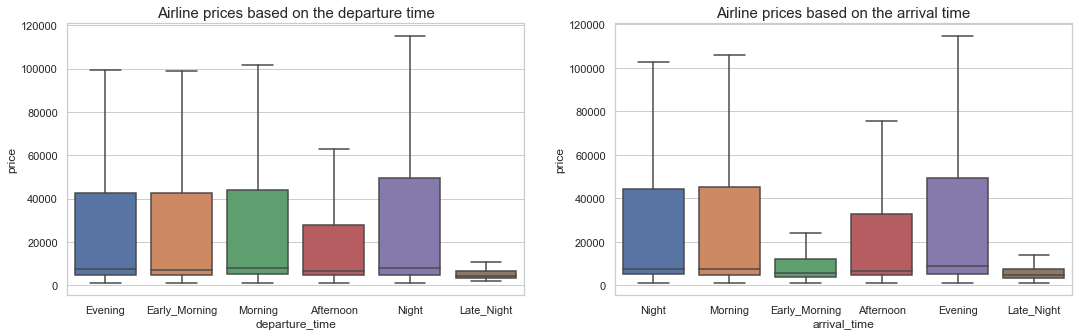

In [13]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

##### As expected, leaving at late night or arriving at late night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.


### Does the number of stops influences the price?

Text(0.5, 1.0, 'Aipline price based on stops for Business')

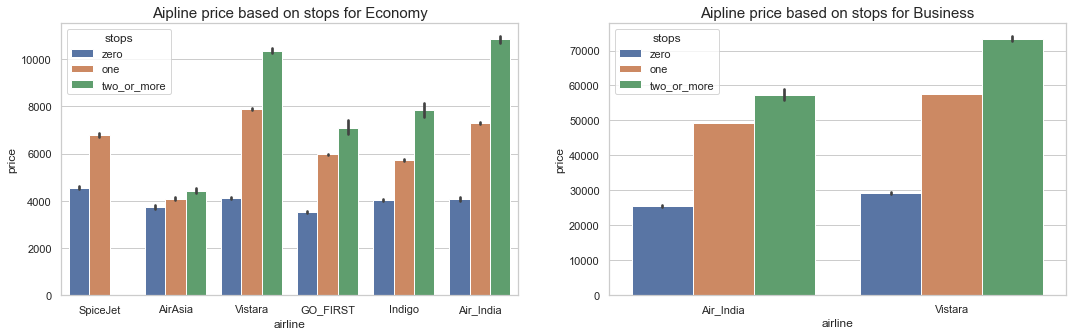

In [14]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.barplot(y="price",x="airline",hue = "stops",data = data[data["class"] == "Economy"]).set_title("Aipline price based on stops for Economy", fontsize = 15)
plt.subplot(1,2,2)
sns.barplot(y="price",x="airline",hue = "stops",data = data[data["class"] == "Business"]).set_title("Aipline price based on stops for Business", fontsize = 15)

##### It's clear that the more stops there are the more expensive the flight is except for AirAsia where the prices seems more constant. The behaviour and different analysis of AirAsia tend to show that it relates to a low cost company.

### Prediction of the flight price

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data_copy = data.copy()
for i in data_copy.select_dtypes('object').columns:
    encoder = LabelEncoder()
    data_copy[i] = encoder.fit_transform(data[i])


In [20]:
data_copy.drop('flight',axis=1,inplace=True)
data_copy

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,2,2,2,5,5,1,2.17,1,5953
1,1,4,2,1,2,4,5,1,2.33,1,5953
2,2,0,2,1,2,1,5,1,2.17,1,5956
3,3,5,2,4,2,0,5,1,2.25,1,5955
4,4,5,2,4,2,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,5,1,4,0,2,3,0,10.08,49,69265
300149,300149,5,1,0,0,5,3,0,10.42,49,77105
300150,300150,5,1,1,0,5,3,0,13.83,49,79099
300151,300151,5,1,1,0,2,3,0,10.00,49,81585


In [21]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_copy.drop('price',axis=1),data_copy['price'], test_size=0.3, random_state=42)

In [22]:
#importing all the models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

In [23]:
# Kfold Cross Validation on all the models(Using a kfold of size = 5)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [24]:
models = {}

models["KNeighborsRegressor"]={"model":KNeighborsRegressor(n_neighbors=50)}
models["LinearRegression"]={"model":LinearRegression()}
models["XGBRegressor"]={"model":xgb.XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)}
models["RandomForestRegressor"]={"model":RandomForestRegressor(n_estimators=50,max_depth=10)}
models['GradientBoostingRegressor'] = {'model':GradientBoostingRegressor(n_estimators=50,max_depth=10)}

In [25]:
X = data_copy.drop('price',axis=1)
y = data_copy['price']

In [26]:
#cross validation to get the best model
cv = KFold(n_splits=5)
for key,item in models.items():
    reg_model = item['model']
    print(item['model'])
    score = cross_val_score(estimator=reg_model,X = X,y = y,cv=cv,scoring='r2')
    print(score)

KNeighborsRegressor(n_neighbors=50)
[-0.07962379 -0.52367738 -1.62224539  0.63094335 -0.07112666]
LinearRegression()
[-0.30106708 -0.20089724 -0.15897985  0.83739966  0.07799402]
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=5,
             num_parallel_tree=None, predictor=None, random_state=1,
             reg_alpha=None, reg_lambda=None, ...)
[0.50299597 0.61482207 0.58819734 0.7810923  0.17022275]
RandomForestRegressor(max_depth=10, n_estim

In [27]:
#Clearly the Gradient Boosting algorithm does better in estimating, let us explore
reg_model.fit(X_train,y_train)
GradientBoostingRegressor(max_depth=10, n_estimators=50)
predicted = reg_model.predict(X_test)
predicted

array([ 5243.34210861, 67286.85981066,  7516.49581917, ...,
        2835.86952081,  3963.72219169,  3740.76195651])

In [29]:
actual_values = y_test.values

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(actual_values,predicted)

1850.6678066719098

In [31]:
reg_model.score(X_test,y_test)

0.9774183884081731

In [32]:
final_model = GradientBoostingRegressor(max_depth=100,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
final_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=100)

In [33]:
final_model.score(X_test,y_test)

0.9807030705753226

<AxesSubplot:>

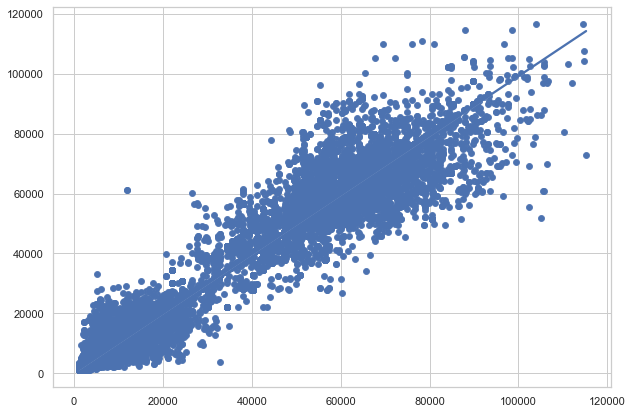

In [34]:
Predictions = final_model.predict(X_test)
Actual = y_test.values
plt.figure(figsize=(10,7))
sns.scatterplot(x = Actual,y = Predictions)
sns.regplot(x = Actual,y = Predictions)

In [ ]:
# Most of the data is along the reg fit but may be due to cause of some outliers some predictions are off